# Import Libraries & DataSet

In [1]:
import pandas as pd
import re
import pickle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 

In [2]:
df = pd.read_csv('capitals_dataset_Final_Corpus_FINAL.csv')

# DISPLAY DATASET 

In [3]:
df.head()

Capitals Text Generation Sentiment Label  \
0  😢 The outdated knowledge base hindered competi...        Negative   
1  🌟 Jack’s innovative thinking drove the project...        Positive   
2  💹 Financial assets might not always result in ...        Negative   
3  Her tough love approach built strong, resilien...        Positive   
4                  🏆 Celebrating academic success! 🎉        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
0  Organizational Capital     1846      Sina Weibo  2024-05-09  04:58:34   
1    Intellectual Capital     4915           Viber  2024-07-24  04:58:34   
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
3       Emotional Capital     8701     Baidu Tieba  2024-03-20  04:58:34   
4  Organizational Capital     1301        Facebook  2024-03-01  04:58:34   

         Day    Country  Age-Of-User  
0   Thursday     France           65  
1  Wednesday     Russia           59  
2    Tuesday      Italy           39  
3  Wednesday       Iran           63  
4     Friday  Hong Kong           36

In [4]:
df.tail()

Capitals Text Generation Sentiment Label  \
377495  📉 Investing wisely can feel like an organized ...        Positive   
377496  📈 Avery’s good reputation led to major increas...        Positive   
377497  👗 Bad fashion choices can impact your social i...        Negative   
377498  🎉 Religious celebrations include good joyful m...        Positive   
377499  🌟 Her high emotional intelligence fostered a h...        Positive   

           Predicted Capital  User-Id Social-Accounts        Date      Time  \
377495      Economic Capital     9992          Flickr  2023-12-15  04:58:36   
377496  Reputational Capital     2972       Pinterest  2023-11-06  04:58:37   
377497      Cultural Capital     3441           Viber  2024-01-10  04:58:33   
377498     Religious Capital     7835       Instagram  2024-04-22  04:58:33   
377499     Emotional Capital     3286      Sina Weibo  2024-05-21  04:58:34   

              Day    Country  Age-Of-User  
377495     Friday      Italy           44  
377496     Monday  Argentina           24  
377497  Wednesday     Greece           34  
377498     Monday     Russia           23  
377499    Tuesday      India           56

# Data Set Shape

In [5]:
df.shape

(377500, 10)

# CHECKING DTYPES 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377500 entries, 0 to 377499
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Capitals Text Generation  377500 non-null  object
 1   Sentiment Label           377500 non-null  object
 2   Predicted Capital         377500 non-null  object
 3   User-Id                   377500 non-null  int64 
 4   Social-Accounts           377500 non-null  object
 5   Date                      377500 non-null  object
 6   Time                      377500 non-null  object
 7   Day                       377500 non-null  object
 8   Country                   377500 non-null  object
 9   Age-Of-User               377500 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 28.8+ MB


# Summary Statistics 

In [7]:
df.describe()

User-Id    Age-Of-User
count  377500.000000  377500.000000
mean     5493.034856      41.550993
std      2599.724529      13.851658
min      1000.000000      18.000000
25%      3239.000000      30.000000
50%      5490.000000      42.000000
75%      7742.000000      54.000000
max      9999.000000      65.000000

# Step 1: Data Preprocessing


# Define function to remove emojis and unnecessary characters

In [8]:
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text


In [9]:
df['Clean_Capitals Text Generation'] = df['Capitals Text Generation'].apply(remove_unnecessary_characters)

# Display the first few rows to check the cleaning

In [10]:
df.head()

Capitals Text Generation Sentiment Label  \
0  😢 The outdated knowledge base hindered competi...        Negative   
1  🌟 Jack’s innovative thinking drove the project...        Positive   
2  💹 Financial assets might not always result in ...        Negative   
3  Her tough love approach built strong, resilien...        Positive   
4                  🏆 Celebrating academic success! 🎉        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
0  Organizational Capital     1846      Sina Weibo  2024-05-09  04:58:34   
1    Intellectual Capital     4915           Viber  2024-07-24  04:58:34   
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
3       Emotional Capital     8701     Baidu Tieba  2024-03-20  04:58:34   
4  Organizational Capital     1301        Facebook  2024-03-01  04:58:34   

         Day    Country  Age-Of-User  \
0   Thursday     France           65   
1  Wednesday     Russia           59   
2    Tuesday      Italy           39   
3  Wednesday       Iran           63   
4     Friday  Hong Kong           36   

                      Clean_Capitals Text Generation  
0  The outdated knowledge base hindered competiti...  
1  Jacks innovative thinking drove the project fo...  
2  Financial assets might not always result in a ...  
3  Her tough love approach built strong resilient...  
4                       Celebrating academic success

# TOKENIZATION

In [11]:
import nltk
from nltk.tokenize import word_tokenize

In [12]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []

df['Tokens'] = df['Clean_Capitals Text Generation'].apply(tokenize_text)

In [13]:
df.head()

Capitals Text Generation Sentiment Label  \
0  😢 The outdated knowledge base hindered competi...        Negative   
1  🌟 Jack’s innovative thinking drove the project...        Positive   
2  💹 Financial assets might not always result in ...        Negative   
3  Her tough love approach built strong, resilien...        Positive   
4                  🏆 Celebrating academic success! 🎉        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
0  Organizational Capital     1846      Sina Weibo  2024-05-09  04:58:34   
1    Intellectual Capital     4915           Viber  2024-07-24  04:58:34   
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
3       Emotional Capital     8701     Baidu Tieba  2024-03-20  04:58:34   
4  Organizational Capital     1301        Facebook  2024-03-01  04:58:34   

         Day    Country  Age-Of-User  \
0   Thursday     France           65   
1  Wednesday     Russia           59   
2    Tuesday      Italy           39   
3  Wednesday       Iran           63   
4     Friday  Hong Kong           36   

                      Clean_Capitals Text Generation  \
0  The outdated knowledge base hindered competiti...   
1  Jacks innovative thinking drove the project fo...   
2  Financial assets might not always result in a ...   
3  Her tough love approach built strong resilient...   
4                       Celebrating academic success   

                                              Tokens  
0  [The, outdated, knowledge, base, hindered, com...  
1  [Jacks, innovative, thinking, drove, the, proj...  
2  [Financial, assets, might, not, always, result...  
3  [Her, tough, love, approach, built, strong, re...  
4                   [Celebrating, academic, success]

# Data Normalization 

In [14]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    else:
        text = str(text)  # Convert non-string inputs to string
    return text

# Apply normalize_text function to the 'clean_Capitals Text Generation' column
df['Normalized_text'] = df['Clean_Capitals Text Generation'].apply(normalize_text)

In [15]:
df.head()

Capitals Text Generation Sentiment Label  \
0  😢 The outdated knowledge base hindered competi...        Negative   
1  🌟 Jack’s innovative thinking drove the project...        Positive   
2  💹 Financial assets might not always result in ...        Negative   
3  Her tough love approach built strong, resilien...        Positive   
4                  🏆 Celebrating academic success! 🎉        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
0  Organizational Capital     1846      Sina Weibo  2024-05-09  04:58:34   
1    Intellectual Capital     4915           Viber  2024-07-24  04:58:34   
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
3       Emotional Capital     8701     Baidu Tieba  2024-03-20  04:58:34   
4  Organizational Capital     1301        Facebook  2024-03-01  04:58:34   

         Day    Country  Age-Of-User  \
0   Thursday     France           65   
1  Wednesday     Russia           59   
2    Tuesday      Italy           39   
3  Wednesday       Iran           63   
4     Friday  Hong Kong           36   

                      Clean_Capitals Text Generation  \
0  The outdated knowledge base hindered competiti...   
1  Jacks innovative thinking drove the project fo...   
2  Financial assets might not always result in a ...   
3  Her tough love approach built strong resilient...   
4                       Celebrating academic success   

                                              Tokens  \
0  [The, outdated, knowledge, base, hindered, com...   
1  [Jacks, innovative, thinking, drove, the, proj...   
2  [Financial, assets, might, not, always, result...   
3  [Her, tough, love, approach, built, strong, re...   
4                   [Celebrating, academic, success]   

                                     Normalized_text  
0  the outdated knowledge base hindered competiti...  
1  jacks innovative thinking drove the project fo...  
2  financial assets might not always result in a ...  
3  her tough love approach built strong resilient...  
4                       celebrating academic success

# Removing Stopwords 

In [16]:
stop_words = set(stopwords.words('english'))
df['Text_without_stopwords'] = df['Tokens'].apply(lambda tokens: ' '.join([word for word in tokens if word.lower() not in stop_words]))

In [17]:
# Display a few examples of the cleaned text
print(df[['Text_without_stopwords']].head())

                              Text_without_stopwords
0  outdated knowledge base hindered competitive a...
1    Jacks innovative thinking drove project forward
2  Financial assets might always result stronger ...
3  tough love approach built strong resilient rel...
4                       Celebrating academic success


In [18]:
df.head()

Capitals Text Generation Sentiment Label  \
0  😢 The outdated knowledge base hindered competi...        Negative   
1  🌟 Jack’s innovative thinking drove the project...        Positive   
2  💹 Financial assets might not always result in ...        Negative   
3  Her tough love approach built strong, resilien...        Positive   
4                  🏆 Celebrating academic success! 🎉        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
0  Organizational Capital     1846      Sina Weibo  2024-05-09  04:58:34   
1    Intellectual Capital     4915           Viber  2024-07-24  04:58:34   
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
3       Emotional Capital     8701     Baidu Tieba  2024-03-20  04:58:34   
4  Organizational Capital     1301        Facebook  2024-03-01  04:58:34   

         Day    Country  Age-Of-User  \
0   Thursday     France           65   
1  Wednesday     Russia           59   
2    Tuesday      Italy           39   
3  Wednesday       Iran           63   
4     Friday  Hong Kong           36   

                      Clean_Capitals Text Generation  \
0  The outdated knowledge base hindered competiti...   
1  Jacks innovative thinking drove the project fo...   
2  Financial assets might not always result in a ...   
3  Her tough love approach built strong resilient...   
4                       Celebrating academic success   

                                              Tokens  \
0  [The, outdated, knowledge, base, hindered, com...   
1  [Jacks, innovative, thinking, drove, the, proj...   
2  [Financial, assets, might, not, always, result...   
3  [Her, tough, love, approach, built, strong, re...   
4                   [Celebrating, academic, success]   

                                     Normalized_text  \
0  the outdated knowledge base hindered competiti...   
1  jacks innovative thinking drove the project fo...   
2  financial assets might not always result in a ...   
3  her tough love approach built strong resilient...   
4                       celebrating academic success   

                              Text_without_stopwords  
0  outdated knowledge base hindered competitive a...  
1    Jacks innovative thinking drove project forward  
2  Financial assets might always result stronger ...  
3  tough love approach built strong resilient rel...  
4                       Celebrating academic success

# SENTIMENT VALUECOUNTS

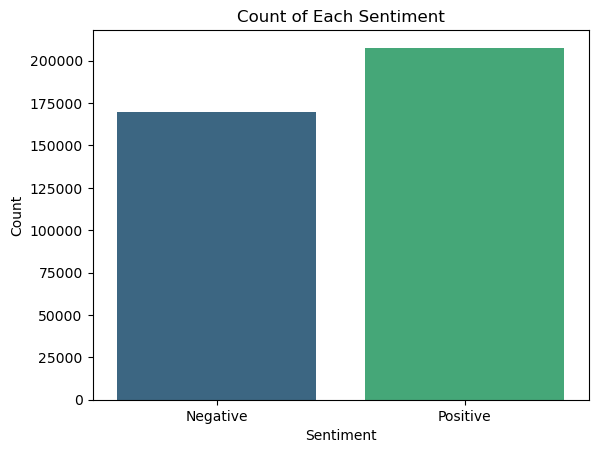

In [19]:
sns.countplot(data=df, x='Sentiment Label', palette='viridis')
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


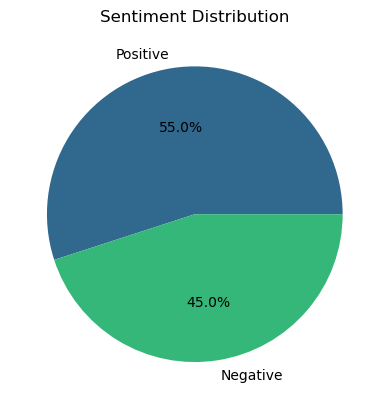

In [20]:
df['Sentiment Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['Sentiment Label'].unique())))
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()


In [21]:
!pip install wordcloud

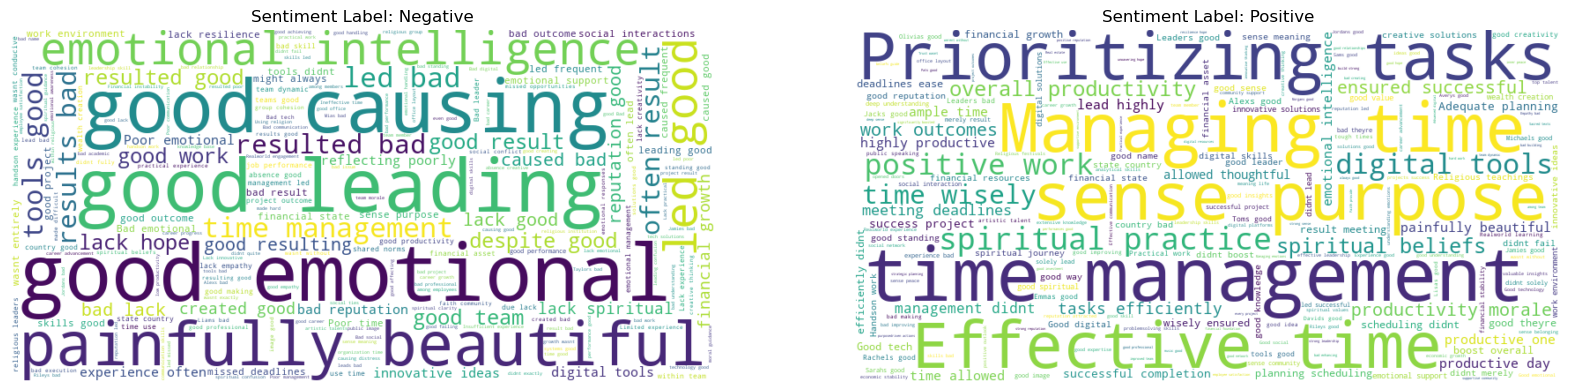

In [22]:
from wordcloud import WordCloud

sentiments = df['Sentiment Label'].unique()
plt.figure(figsize=(20, 10))
for i, sentiment in enumerate(sentiments):
    plt.subplot(1, len(sentiments), i+1)
    text = ' '.join(df[df['Sentiment Label'] == sentiment]['Text_without_stopwords'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Sentiment Label: {sentiment}')
plt.show()


In [23]:
df['Sentiment Label'].value_counts()

Sentiment Label
Positive    207625
Negative    169875
Name: count, dtype: int64

In [24]:
df['text_length'] = df['Text_without_stopwords'].apply(len)


In [25]:
df['text_length']

0         61
1         47
2         60
3         56
4         28
          ..
377495    41
377496    55
377497    39
377498    50
377499    60
Name: text_length, Length: 377500, dtype: int64

# Count the occurrences of each capital

In [26]:
capital_counts = df['Predicted Capital'].value_counts()
capital_counts

Predicted Capital
Economic Capital            30000
Religious Capital           28000
Intellectual Capital        26000
Emotional Capital           25000
Social Capital              24000
Temporal Capital            24000
Digital Capital             24000
Human Leadership Capital    23000
Creative Capital            23000
Physical Capital            23000
Cultural Capital            22000
Experiential Capital        22000
Psychological Capital       21500
Organizational Capital      21000
Reputational Capital        21000
Spiritual Capital           20000
Name: count, dtype: int64

# Identify the most and least used capitals

In [27]:
most_used = capital_counts.idxmax()
least_used = capital_counts.idxmin()

In [28]:
most_used

'Economic Capital'

In [29]:
least_used

'Spiritual Capital'

In [30]:
df_filtered = df[df['Predicted Capital'].isin([most_used, least_used])]

In [31]:
df_filtered

Capitals Text Generation Sentiment Label  \
2       💹 Financial assets might not always result in ...        Negative   
8       📈 Financial resources support growth and devel...        Positive   
17      ✨ Riley’s good strong values guide her to a fu...        Positive   
31                   💵 The economy's growth is fantastic,        Positive   
35      💰 Austria’s focus on economic health is not ba...        Positive   
...                                                   ...             ...   
377446           😞 Negative cash flow weakened stability.        Negative   
377470              🚀 The economy's performance is great.        Positive   
377487            🏚️ Real estate returns weren’t stellar.        Negative   
377489  🚀 Tom’s reliable income generation contributes...        Positive   
377495  📉 Investing wisely can feel like an organized ...        Positive   

        Predicted Capital  User-Id Social-Accounts        Date      Time  \
2        Economic Capital     4129       Pinterest  2024-07-30  04:58:36   
8        Economic Capital     1316        Telegram  2024-05-17  04:58:36   
17      Spiritual Capital     3915        Facebook  2024-05-01  04:58:35   
31       Economic Capital     6101        LinkedIn  2024-04-20  04:58:36   
35       Economic Capital     1292        Telegram  2024-06-01  04:58:36   
...                   ...      ...             ...         ...       ...   
377446   Economic Capital     6972       VKontakte  2023-11-20  04:58:36   
377470   Economic Capital     1404       Pinterest  2023-11-07  04:58:36   
377487   Economic Capital     7734         Twitter  2024-01-24  04:58:36   
377489   Economic Capital     8756              QQ  2024-04-07  04:58:36   
377495   Economic Capital     9992          Flickr  2023-12-15  04:58:36   

              Day      Country  Age-Of-User  \
2         Tuesday        Italy           39   
8          Friday      Nigeria           59   
17      Wednesday  Afghanistan           41   
31       Saturday    Australia           25   
35       Saturday          USA           45   
...           ...          ...          ...   
377446     Monday        Egypt           35   
377470    Tuesday           UK           58   
377487  Wednesday       Turkey           41   
377489     Sunday        Spain           56   
377495     Friday        Italy           44   

                           Clean_Capitals Text Generation  \
2       Financial assets might not always result in a ...   
8       Financial resources support growth and develop...   
17      Rileys good strong values guide her to a fulfi...   
31                       The economys growth is fantastic   
35      Austrias focus on economic health is not bad a...   
...                                                   ...   
377446              Negative cash flow weakened stability   
377470                  The economys performance is great   
377487                 Real estate returns werent stellar   
377489  Toms reliable income generation contributes to...   
377495   Investing wisely can feel like an organized mess   

                                                   Tokens  \
2       [Financial, assets, might, not, always, result...   
8       [Financial, resources, support, growth, and, d...   
17      [Rileys, good, strong, values, guide, her, to,...   
31                 [The, economys, growth, is, fantastic]   
35      [Austrias, focus, on, economic, health, is, no...   
...                                                   ...   
377446        [Negative, cash, flow, weakened, stability]   
377470            [The, economys, performance, is, great]   
377487           [Real, estate, returns, werent, stellar]   
377489  [Toms, reliable, income, generation, contribut...   
377495  [Investing, wisely, can, feel, like, an, organ...   

                                          Normalized_text  \
2       financial assets might not always result in a ...   
8       financial resources support growth

In [32]:
capital_counts = df_filtered['Predicted Capital'].value_counts()

In [33]:
capital_counts

Predicted Capital
Economic Capital     30000
Spiritual Capital    20000
Name: count, dtype: int64

# The most and least used capitals

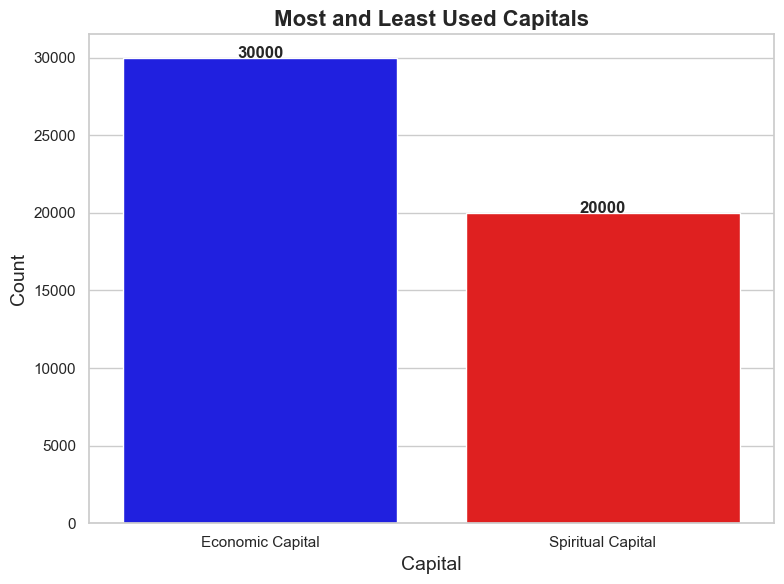

In [34]:
# Set up the color palette for the most and least used capitals
palette = {most_used: 'blue', least_used: 'red'}

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(x=capital_counts.index, y=capital_counts.values, palette=palette)

# Add titles and labels
plt.title('Most and Least Used Capitals', fontsize=16, weight='bold')
plt.xlabel('Capital', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display values on top of each bar
for i, value in enumerate(capital_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12, weight='bold')

# Customize the background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()

# Most and Least Used Capitals by Age of Users

C:\Users\Cyber World\AppData\Local\Temp\ipykernel_2744\2493525875.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  boxplot.set_yticklabels(boxplot.get_yticks(), fontsize=12)


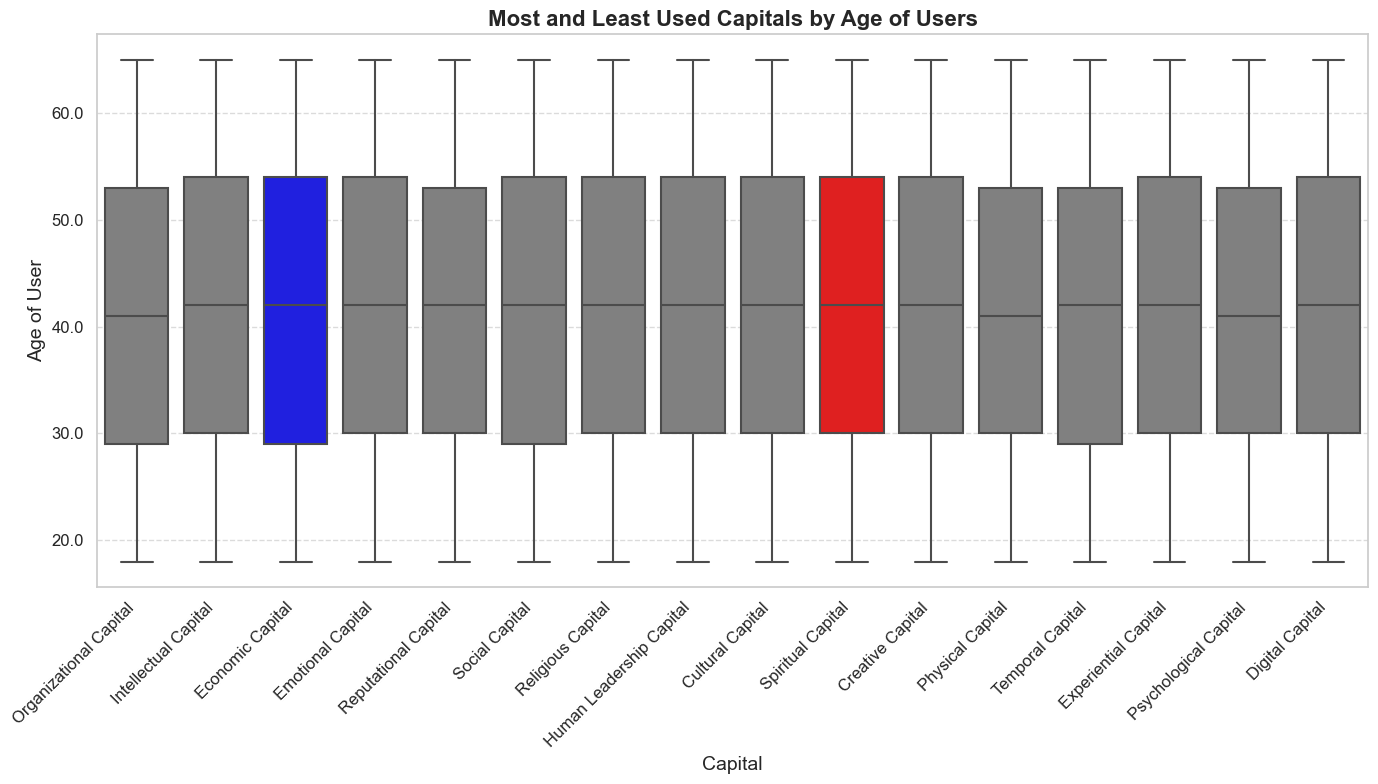

In [35]:
unique_capitals = df['Predicted Capital'].unique()
palette = {capital: 'grey' for capital in unique_capitals}
palette[most_used] = 'blue'
palette[least_used] = 'red'
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a box plot with custom color mapping
boxplot = sns.boxplot(x='Predicted Capital', y='Age-Of-User', data=df, palette=palette)

# Add titles and labels
plt.title('Most and Least Used Capitals by Age of Users', fontsize=16, weight='bold')
plt.xlabel('Capital', fontsize=14)
plt.ylabel('Age of User', fontsize=14)

# Customize the x-axis and y-axis labels
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)
boxplot.set_yticklabels(boxplot.get_yticks(), fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the background color
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()

# Count occurrences of each country

In [36]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']


In [37]:
country_counts

Country  Count
0          India  11409
1           Iran  11309
2        Germany  11290
3      Australia  11268
4        Vietnam  11253
5          China  11226
6         Mexico  11192
7   Saudi Arabia  11184
8      Singapore  11182
9         Sweden  11179
10        France  11168
11       Nigeria  11143
12           USA  11141
13        Russia  11112
14      Malaysia  11111
15        Brazil  11086
16   Philippines  11080
17         Spain  11077
18  South Africa  11067
19      Thailand  11058
20   Afghanistan  11051
21        Greece  11049
22        Turkey  11047
23        Canada  11027
24      Pakistan  11026
25     Argentina  11022
26   New Zealand  10999
27         Japan  10992
28         Egypt  10978
29     Hong Kong  10972
30            UK  10970
31     Indonesia  10963
32         Italy  10956
33   South Korea  10913

# Identify most and least used countries

In [38]:
most_used_country = country_counts.iloc[0]
least_used_country = country_counts.iloc[-1]

In [39]:
most_used_country

Country    India
Count      11409
Name: 0, dtype: object

In [40]:
least_used_country

Country    South Korea
Count            10913
Name: 33, dtype: object

# Distribution of Capital Use by Country

In [41]:
import plotly.express as px
fig = px.bar(country_counts, x='Country', y='Count',
             title='Distribution of Capital Use by Country',
             labels={'Country': 'Country', 'Count': 'Number of Entries'},
             color='Count',
             color_continuous_scale=px.colors.sequential.Viridis)

# Add annotations for the most and least used countries
fig.add_annotation(
    x=most_used_country['Country'], 
    y=most_used_country['Count'],
    text=f"Most Used: {most_used_country['Country']} ({most_used_country['Count']})",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color="red")
)

fig.add_annotation(
    x=least_used_country['Country'], 
    y=least_used_country['Count'],
    text=f"Least Used: {least_used_country['Country']} ({least_used_country['Count']})",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=40,
    font=dict(color="blue")
)

# Show the plot
fig.show()

C:\Users\Cyber World\AppData\Local\Temp\ipykernel_2744\2272360197.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



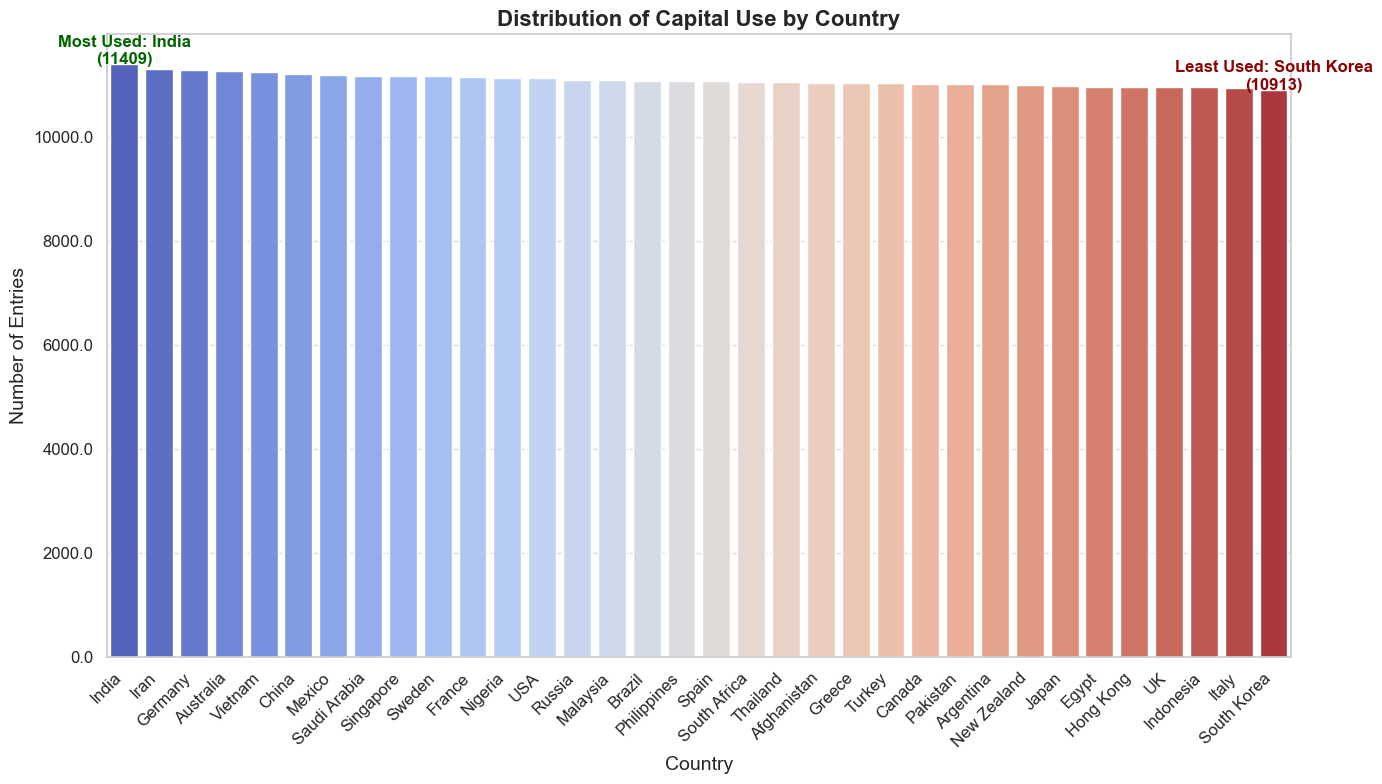

In [42]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create a bar plot with a color palette
barplot = sns.barplot(x='Country', y='Count', data=country_counts, palette='coolwarm')

# Add titles and labels
plt.title('Distribution of Capital Use by Country', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Entries', fontsize=14)

# Customize the bar plot
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha='right', fontsize=12)
barplot.set_yticklabels(barplot.get_yticks(), fontsize=12)

# Annotate the most and least used countries
plt.text(most_used_country.name, most_used_country['Count'] + 2,
         f'Most Used: {most_used_country["Country"]}\n({most_used_country["Count"]})',
         color='darkgreen', ha='center', fontsize=12, weight='bold')

plt.text(least_used_country.name, least_used_country['Count'] + 2,
         f'Least Used: {least_used_country["Country"]}\n({least_used_country["Count"]})',
         color='darkred', ha='center', fontsize=12, weight='bold')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Word Frequency Distribution

In [43]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


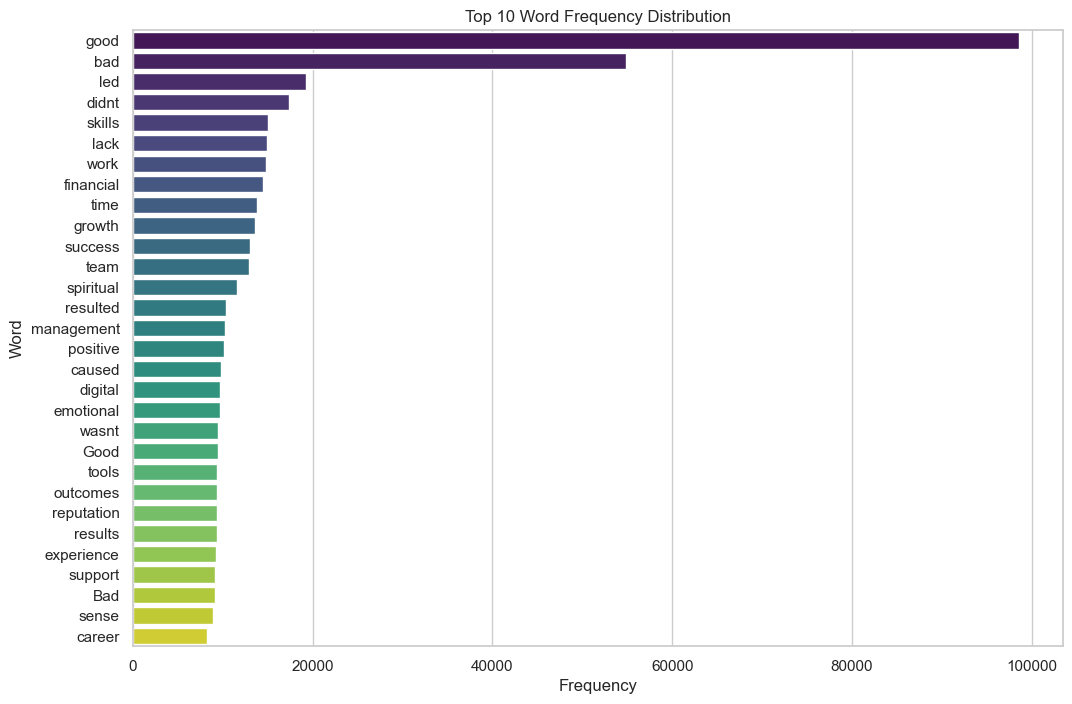

In [44]:
# Tokenize the words
all_words = word_tokenize(' '.join(df['Text_without_stopwords']))

# Get the frequency distribution
word_freq = FreqDist(all_words)

# Convert the frequency distribution to a DataFrame
word_freq_df = pd.DataFrame(word_freq.most_common(30), columns=['Word', 'Frequency'])

# Create a seaborn barplot
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='viridis')

plt.title('Top 10 Word Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [45]:
print(df.columns)


Index(['Capitals Text Generation', 'Sentiment Label', 'Predicted Capital',
       'User-Id', 'Social-Accounts', 'Date', 'Time', 'Day', 'Country',
       'Age-Of-User', 'Clean_Capitals Text Generation', 'Tokens',
       'Normalized_text', 'Text_without_stopwords', 'text_length'],
      dtype='object')


# Plot Age-Of-User and Country Relation
This graph shows the distribution of ages for users in different countries

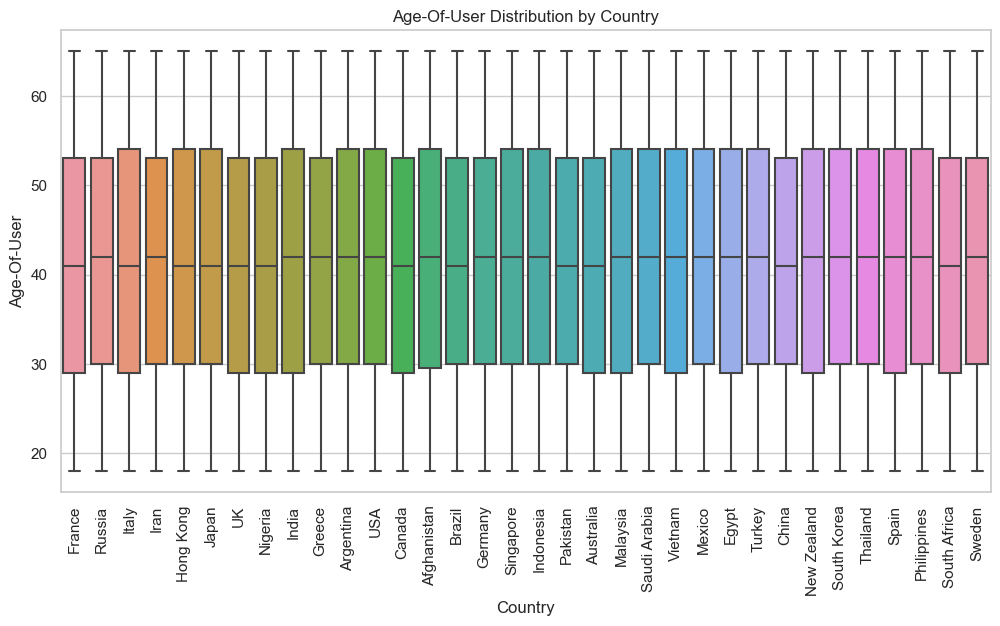

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Age-Of-User', data=df)
plt.title('Age-Of-User Distribution by Country')
plt.xticks(rotation=90)
plt.show()

# Plot Age-Of-User and Predicted Capital Relation
This graph displays the distribution of user ages for each predicted capital type. 
This helps in understanding which age groups are associated with which types of predicted capital.

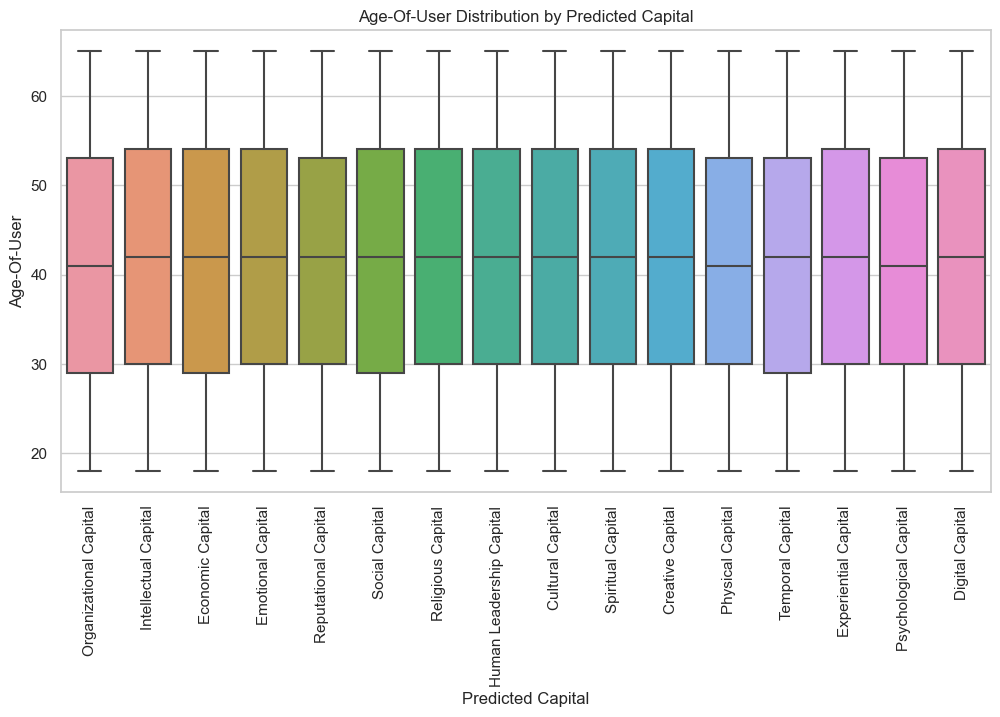

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Predicted Capital', y='Age-Of-User', data=df)
plt.title('Age-Of-User Distribution by Predicted Capital')
plt.xticks(rotation=90)
plt.show()

# Plot the count of Predicted Capital by Age-Of-User and Country
This graph shows the count of each type of predicted capital for each country. The hue differentiates the types of predicted capital, making it clear how many messages of each type are generated by users from different countries.
Helps in understanding the distribution and popularity of different capital types across countries, providing insights into geographical trends and cultural preferences.

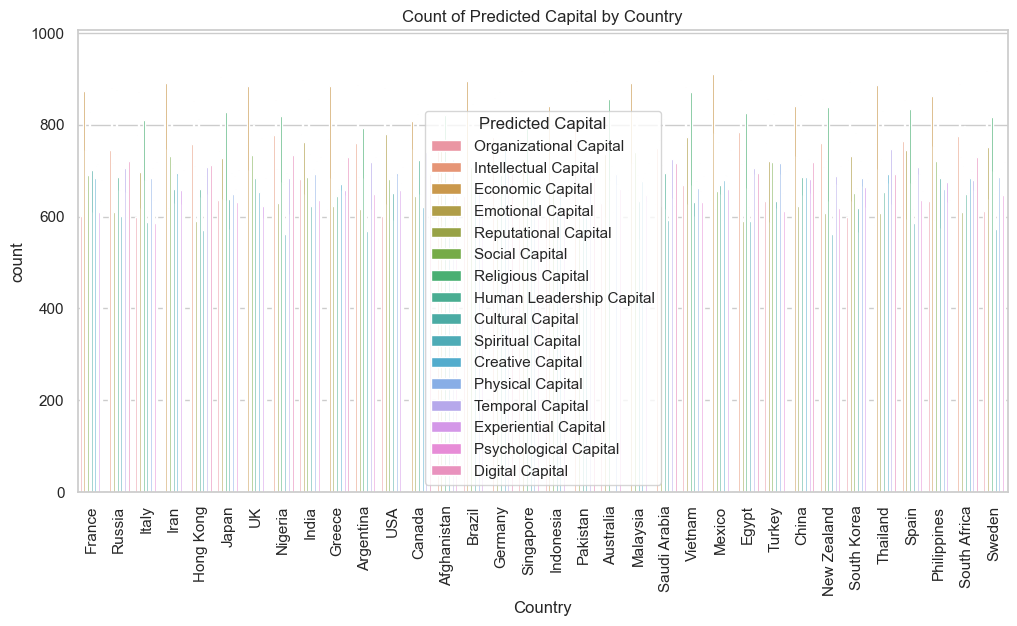

In [48]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Country', hue='Predicted Capital')
plt.title('Count of Predicted Capital by Country')
plt.xticks(rotation=90)
plt.show()

# Plot the count of Predicted Capital by Age-Of-User
## Purpose: 
This histogram shows the count of each type of predicted capital for different ages. The stacking allows for a clear comparison of the distribution of capital types across different age groups.
## Usage:
Useful for identifying which age groups are most likely to generate specific types of capital messages, highlighting age-related trends in message generation.

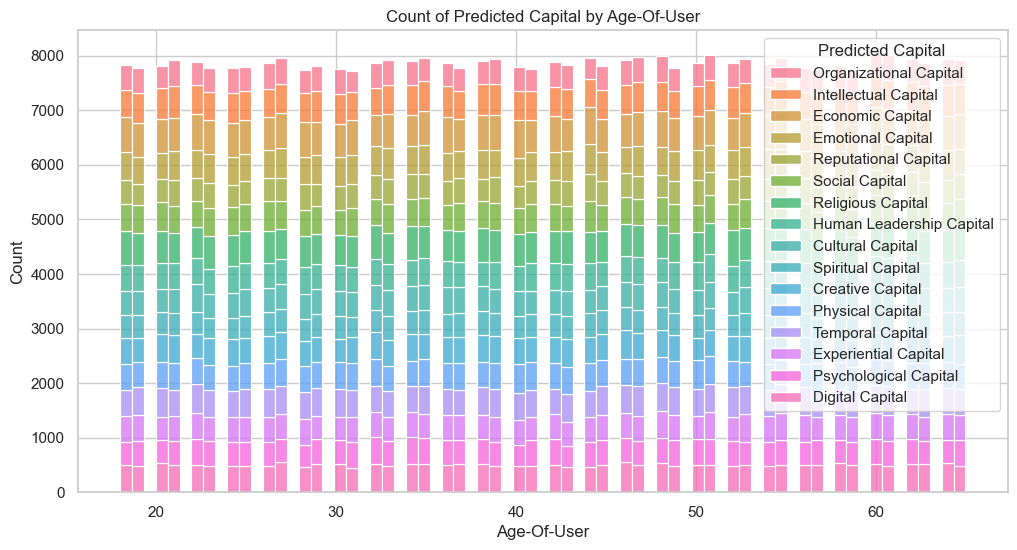

In [49]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age-Of-User', hue='Predicted Capital', multiple="stack")
plt.title('Count of Predicted Capital by Age-Of-User')
plt.show()

# Prepare Features and Labels

In [50]:
X = df['Text_without_stopwords']
y = df[['Predicted Capital', 'Sentiment Label']].copy()

# Encode Labels

In [51]:
label_encoder_capital_LSTM_WithoutGS = LabelEncoder()
label_encoder_sentiment_LSTM_WithoutGS = LabelEncoder()
y['Capital'] = label_encoder_capital_LSTM_WithoutGS.fit_transform(y['Predicted Capital'])
y['Sentiment'] = label_encoder_sentiment_LSTM_WithoutGS.fit_transform(y['Sentiment Label'])

# Split the dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
y_train_sentiment = to_categorical(y_train['Sentiment'])
y_test_sentiment = to_categorical(y_test['Sentiment'])

In [54]:
y_train_sentiment

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [55]:
y_test_sentiment

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Step 2: Feature Extraction

# Tokenization and Padding for Sentiment Model

In [56]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [57]:
tokenizer_LSTM_WithoutGS = Tokenizer(num_words=15000, lower=True, split=' ')
tokenizer_LSTM_WithoutGS.fit_on_texts(X_train.values)
X_train_seq = tokenizer_LSTM_WithoutGS.texts_to_sequences(X_train.values)
X_test_seq = tokenizer_LSTM_WithoutGS.texts_to_sequences(X_test.values)
X_train_pad = pad_sequences(X_train_seq, maxlen=150)
X_test_pad = pad_sequences(X_test_seq, maxlen=X_train_pad.shape[1])

# Define Sentiment Model
### Sequential+Lstm

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense, Dropout

In [59]:
sentiment_model_LSTM_WithoutGS = Sequential()
sentiment_model_LSTM_WithoutGS.add(Embedding(input_dim=15000, output_dim=128)) 
sentiment_model_LSTM_WithoutGS.add(SpatialDropout1D(0.3))
sentiment_model_LSTM_WithoutGS.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
sentiment_model_LSTM_WithoutGS.add(Dropout(0.5))
sentiment_model_LSTM_WithoutGS.add(Dense(y_train_sentiment.shape[1], activation='softmax'))

# Compile Sentiment Model

In [60]:
sentiment_model_LSTM_WithoutGS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Sentiment Model

In [61]:
history = sentiment_model_LSTM_WithoutGS.fit(X_train_pad, y_train_sentiment, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_sentiment), verbose=2)

Epoch 1/5
9438/9438 - 842s - 89ms/step - accuracy: 0.9577 - loss: 0.1059 - val_accuracy: 0.9841 - val_loss: 0.0390
Epoch 2/5
9438/9438 - 928s - 98ms/step - accuracy: 0.9840 - loss: 0.0414 - val_accuracy: 0.9913 - val_loss: 0.0208
Epoch 3/5
9438/9438 - 846s - 90ms/step - accuracy: 0.9889 - loss: 0.0281 - val_accuracy: 0.9927 - val_loss: 0.0163
Epoch 4/5
9438/9438 - 889s - 94ms/step - accuracy: 0.9904 - loss: 0.0236 - val_accuracy: 0.9933 - val_loss: 0.0151
Epoch 5/5
9438/9438 - 825s - 87ms/step - accuracy: 0.9914 - loss: 0.0206 - val_accuracy: 0.9937 - val_loss: 0.0133


# Save the Sentiment Model and Tokenizer

In [62]:
# Save the Keras model
sentiment_model_LSTM_WithoutGS.save('sentiment_model_LSTM_WithoutGS.keras')

# Save the tokenizer
with open('tokenizer_LSTM_WithoutGS.pkl', 'wb') as file:
    pickle.dump(tokenizer_LSTM_WithoutGS, file)

# Save the label encoders
with open('label_encoder_sentiment_LSTM_WithoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_sentiment_LSTM_WithoutGS, f)

with open('label_encoder_capital_LSTM_WithoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_capital_LSTM_WithoutGS, f)

# Load the Model

In [63]:
from tensorflow.keras.models import load_model

In [64]:
# Load the Keras model
sentiment_model_LSTM_WithoutGS = load_model('sentiment_model_LSTM.keras')

# Load the tokenizer
with open('tokenizer_LSTM_WithoutGS.pkl', 'rb') as file:
    tokenizer_LSTM_WithoutGS = pickle.load(file)

# Load the label encoder for sentiment
with open('label_encoder_sentiment_LSTM.pkl', 'rb') as f:
    label_encoder_sentiment_LSTM_WithoutGS = pickle.load(f)

# Load the label encoder for capital
with open('label_encoder_capital_LSTM_WithoutGS.pkl', 'rb') as f:
    label_encoder_capital_LSTM_WithoutGS = pickle.load(f)

#  Evaluation of the Sentiment Model

In [65]:
y_pred_sentiment = sentiment_model_LSTM_WithoutGS.predict(X_test_pad)
y_pred_labels_sentiment = np.argmax(y_pred_sentiment, axis=1)
y_true_labels_sentiment = np.argmax(y_test_sentiment, axis=1)

2360/2360 ━━━━━━━━━━━━━━━━━━━━ 61s 26ms/step


# Results
### Accuracy, Precision, Recall, F1 Score


In [66]:
accuracy = accuracy_score(y_true_labels_sentiment, y_pred_labels_sentiment)
precision = precision_score(y_true_labels_sentiment, y_pred_labels_sentiment, average='weighted')
recall = recall_score(y_true_labels_sentiment, y_pred_labels_sentiment, average='weighted')
f1 = f1_score(y_true_labels_sentiment, y_pred_labels_sentiment, average='weighted')

# Print metrics

In [67]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5691920529801324
Precision: 0.5745554040466537
Recall: 0.5691920529801324
F1 Score: 0.5702671139203388


In [68]:
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the metrics

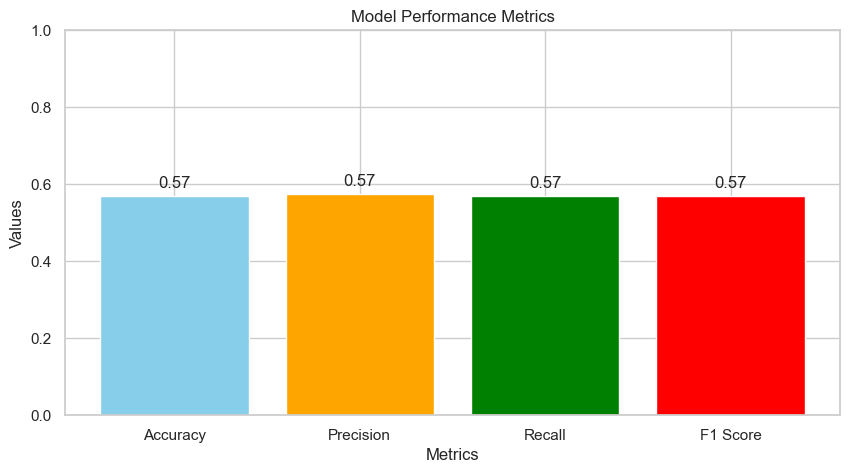

In [69]:
plt.figure(figsize=(10, 5))
plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
plt.show()

# Classification Report

In [70]:
report_sentiment = classification_report(y_true_labels_sentiment, y_pred_labels_sentiment, target_names=label_encoder_sentiment_LSTM_WithoutGS.classes_)
print(f'Classification Report (Sentiment):\n{report_sentiment}')

Classification Report (Sentiment):
              precision    recall  f1-score   support

    Negative       0.52      0.58      0.55     33975
    Positive       0.62      0.56      0.59     41525

    accuracy                           0.57     75500
   macro avg       0.57      0.57      0.57     75500
weighted avg       0.57      0.57      0.57     75500



# Confusion Matrix Display for Sentiment

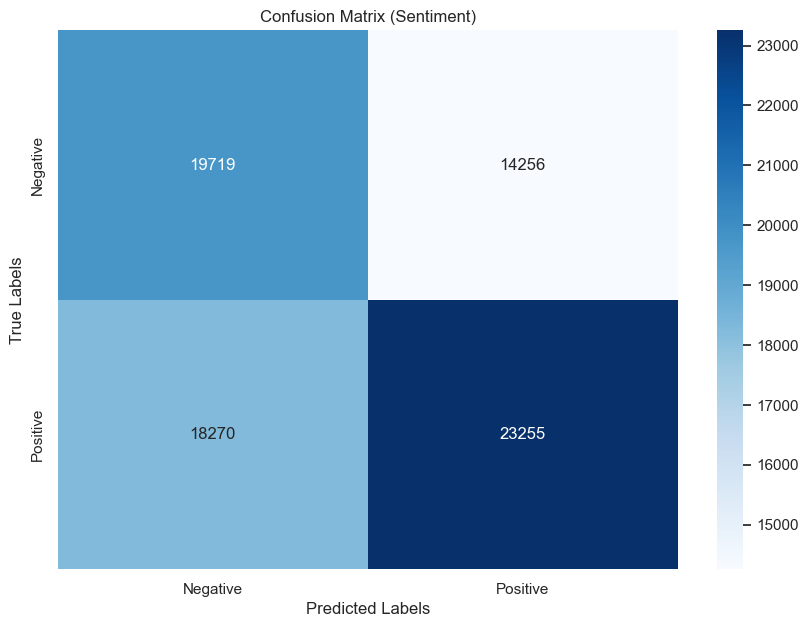

In [71]:
conf_matrix_sentiment = confusion_matrix(y_true_labels_sentiment, y_pred_labels_sentiment)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_sentiment, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_sentiment_LSTM_WithoutGS.classes_, yticklabels=label_encoder_sentiment_LSTM_WithoutGS.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Sentiment)')
plt.show()

# TF-IDF Vectorization for Capital Model

In [72]:
tfidf_vectorizer_LSTM_WithoutGS = TfidfVectorizer(max_features=15000)
X_train_tfidf = tfidf_vectorizer_LSTM_WithoutGS.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer_LSTM_WithoutGS.transform(X_test)

# Define Capital Model

In [73]:
capital_model_LSTM_WithoutGS = Sequential()
capital_model_LSTM_WithoutGS.add(Input(shape=(X_train_tfidf.shape[1],)))
capital_model_LSTM_WithoutGS.add(Dense(64, activation='relu'))
capital_model_LSTM_WithoutGS.add(Dense(len(label_encoder_capital_LSTM_WithoutGS.classes_), activation='softmax'))

# Compile Capital Model

In [74]:
capital_model_LSTM_WithoutGS.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train Capital Model

In [75]:
capital_model_LSTM_WithoutGS.fit(X_train_tfidf, y_train['Capital'], epochs=5, batch_size=32, validation_data=(X_test_tfidf, y_test['Capital']), verbose=2)

Epoch 1/5
9438/9438 - 55s - 6ms/step - accuracy: 0.9853 - loss: 0.1161 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 2/5
9438/9438 - 80s - 9ms/step - accuracy: 0.9997 - loss: 0.0018 - val_accuracy: 0.9998 - val_loss: 9.6115e-04
Epoch 3/5
9438/9438 - 49s - 5ms/step - accuracy: 0.9999 - loss: 4.4259e-04 - val_accuracy: 0.9999 - val_loss: 2.8221e-04
Epoch 4/5
9438/9438 - 50s - 5ms/step - accuracy: 0.9999 - loss: 2.0005e-04 - val_accuracy: 0.9999 - val_loss: 2.7965e-04
Epoch 5/5
9438/9438 - 50s - 5ms/step - accuracy: 1.0000 - loss: 1.3766e-04 - val_accuracy: 1.0000 - val_loss: 1.6690e-04


# Evaluation of the Capital Model

In [76]:
y_pred_capital = capital_model_LSTM_WithoutGS.predict(X_test_tfidf)
y_pred_labels_capital = np.argmax(y_pred_capital, axis=1)
y_true_labels_capital = y_test['Capital']

2360/2360 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step


# Calculate metrics

In [77]:
accuracy = accuracy_score(y_true_labels_capital, y_pred_labels_capital)
precision = precision_score(y_true_labels_capital, y_pred_labels_capital, average='weighted')
recall = recall_score(y_true_labels_capital, y_pred_labels_capital, average='weighted')
f1 = f1_score(y_true_labels_capital, y_pred_labels_capital, average='weighted')

# Print metrics

In [78]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9999602649006623
Precision: 0.9999602737820877
Recall: 0.9999602649006623
F1 Score: 0.9999602651401702


In [79]:
metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plotting the metrics

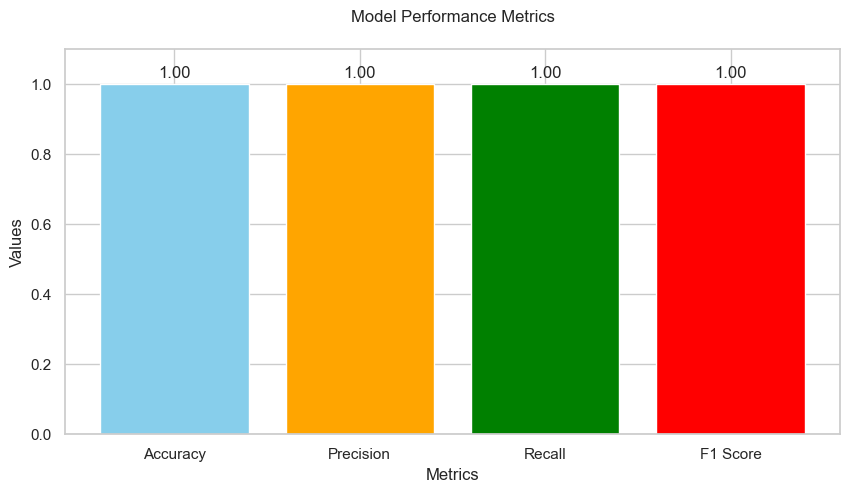

In [80]:
plt.figure(figsize=(10, 5))
plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red'])
plt.ylim(0, 1.1)  # Increase the upper limit slightly to allow space for text

# Adjust padding for the title to avoid overlap
plt.title('Model Performance Metrics', pad=20)

plt.xlabel('Metrics')
plt.ylabel('Values')

# Add the text annotations above the bars
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

In [81]:
# plt.figure(figsize=(10, 5))
# plt.bar(metric_names, metrics, color=['skyblue', 'orange', 'green', 'red'])
# plt.ylim(0, 1)
# plt.title('Model Performance Metrics')
# plt.xlabel('Metrics')
# plt.ylabel('Values')
# for i, v in enumerate(metrics):
#     plt.text(i, v + 0.02, f"{v:.2f}", ha='center')
# plt.show()

# Confusion Matrix of the Capital Model

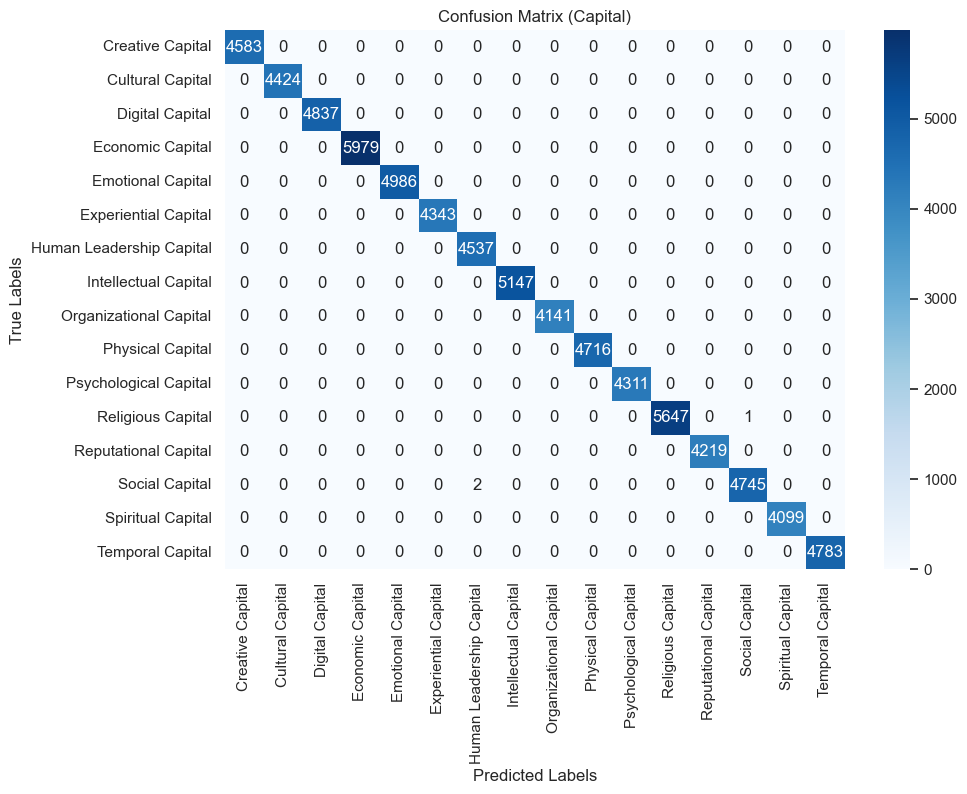

In [82]:
conf_matrix_capital = confusion_matrix(y_true_labels_capital, y_pred_labels_capital)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_capital, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder_capital_LSTM_WithoutGS.classes_, yticklabels=label_encoder_capital_LSTM_WithoutGS.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Capital)')
plt.show()

# Save Capital Model and TF-IDF Vectorizer

In [83]:
# Save the Keras model
capital_model_LSTM_WithoutGS.save('capital_model_LSTM_WithoutGS.keras')

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer_LSTM_WithoutGS.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer_LSTM_WithoutGS, file)

# Save the label encoders
with open('label_encoder_capital_LSTM_WithoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_capital_LSTM_WithoutGS, f)

with open('label_encoder_sentiment_LSTM_WithoutGS.pkl', 'wb') as f:
    pickle.dump(label_encoder_sentiment_LSTM_WithoutGS, f)

# Load model

In [84]:
# Load the Keras model
capital_model_LSTM_WithoutGS = load_model('capital_model_LSTM_WithoutGS.keras')

# Load the TF-IDF vectorizer
with open('tfidf_vectorizer_LSTM_WithoutGS.pkl', 'rb') as file:
    tfidf_vectorizer_LSTM_WithoutGS = pickle.load(file)

# Load the label encoder for capital
with open('label_encoder_capital_LSTM_WithoutGS.pkl', 'rb') as f:
    label_encoder_capital_LSTM_WithoutGS = pickle.load(f)

# Load the label encoder for sentiment
with open('label_encoder_sentiment_LSTM_WithoutGS.pkl', 'rb') as f:
    label_encoder_sentiment_LSTM_WithoutGS = pickle.load(f)

# Step 3: Prediction Pipeline

In [85]:
def predict_pipeline(text):
    clean_text = remove_unnecessary_characters(text)
    tokens = tokenize_text(clean_text)
    text_without_stopwords = ' '.join([word for word in tokens if word.lower() not in stop_words])
    text_tfidf = tfidf_vectorizer_LSTM_WithoutGS.transform([text_without_stopwords])
    
    capital_prediction_encoded = capital_model_LSTM_WithoutGS.predict(text_tfidf).argmax(axis=1)
    text_seq = tokenizer_LSTM_WithoutGS.texts_to_sequences([text_without_stopwords])
    text_pad = pad_sequences(text_seq, maxlen=X_train_pad.shape[1])
    sentiment_prediction_encoded = sentiment_model_LSTM_WithoutGS.predict(text_pad).argmax(axis=1)
    
    capital_prediction = label_encoder_capital_LSTM_WithoutGS.inverse_transform(capital_prediction_encoded)[0]
    sentiment_prediction = label_encoder_sentiment_LSTM_WithoutGS.inverse_transform(sentiment_prediction_encoded)[0]
    
    return capital_prediction, sentiment_prediction


# Test Prediction

In [86]:
test_sentence = "the financial state of country is bad"
capital, sentiment = predict_pipeline(test_sentence)
print(f"Predicted Capital: {capital}, Predicted Sentiment: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Capital: Economic Capital, Predicted Sentiment: Positive


# GUI for Sentiment Prediction

In [87]:
import tkinter as tk
from tkinter import simpledialog, messagebox

In [88]:
def predict():
    text = entry.get()
    if not text:
        messagebox.showwarning("Input Error", "Please enter a sentence.")
        return
    predicted_capital, predicted_sentiment = predict_pipeline(text)

    result_text = f"Predicted Capital: {predicted_capital}\nPredicted Sentiment: {predicted_sentiment}"
    result_window = tk.Toplevel(root)
    result_window.title("Prediction Result")

    result_label = tk.Label(result_window, text=result_text, font=("Helvetica", 14), padx=20, pady=20)
    result_label.pack()

    close_button = tk.Button(result_window, text="Close", command=result_window.destroy, font=("Helvetica", 12), padx=10, pady=5)
    close_button.pack(pady=10)

root = tk.Tk()
root.title("Capital and Sentiment Prediction")
# Set window size and position
root.geometry("500x250+300+200")

label = tk.Label(root, text="Enter a sentence:", font=("Helvetica", 14))
label.pack(pady=20)

entry = tk.Entry(root, width=50, font=("Helvetica", 12))
entry.pack(pady=10)

predict_button = tk.Button(root, text="Predict", command=predict, font=("Helvetica", 12), padx=10, pady=5)
predict_button.pack(pady=20)

root.mainloop()

# Thank You!